# Aliquot Sequences Project

##### By Daniel Rushby (ppppp),  Emil Harris (aa12123),  Haziemah Mohammad Hazmann Emus (aa12123),
##### Joseph Grieveson (aa12123) and Zachary Dunn (aa12123)    
##### (Group Project XXX)

## Aliquot Sequences - An explanation

To understand an aliquot sequence, we furst have to get behind the notion of a  $\textbf{proper divisor}$


A proper divisor of a positive integer $𝑛$ is any positive integer divisor of $𝑛$ other than $n$ itself.

For example, if $n=12$, 

Then the divisiors of $12$ are: $1,2,3,4,6,12$

And the proper divisiors of $12$ are: $1,2,3,4,6$


Using this idea of proper divisiors, we can define the sum of proper divisors, $s(n)$, for a postive integer n to be:

$$ s(n) =  \displaystyle \sum_{d \mid n,\, 0 < d < n} d $$

'It gives the sum of all positive divisors of n, excluding n. Interest in this function goes back to the Pythagoreans (6th century B.C.E.). Aliquot sequences are the seqeunces formed by repeatedly applying this function.'

$\newline$

### Definition of the sequence

For each $n \in \mathbb{N}$, an Aliquot Sequence, $A_n$ is defined as:

$$ A_n = \{n,s(n),s^2(n), s^3(n), ... \} $$

where we have already defined $s(n)$ as the sum of the proper divisors, and where $s^2(n) = s(s(n)), \  s^3(n) = s(s(s(n))),...$etc

If $s^j(n) =0$ for some $j$, the sequence terminates after $j$.

$\newline$

### Interesting facts about Aliquot Sequences:

#### Perfect Numbers:

A perfect number is a postiver integer $n \in \mathbb{N} $, where $s(n) =n$.

For example, $6$ is a perfect number. The proper divisors of 6 are $1,2,3$. Thus, $ s(6) = 1+2+3 = 6$. 

Perfect Numbers are interesting. For starters, all known perfect numbers are even, and they have a specific formula for this, discovered by Euclid in 300 BC:

$$ \text{Even Perfect Number} = 2^{p-1} \cdot (2^p -1) $$

This doesn't mean that there are no odd perfect numbers, it is just that no mathematican has ever discovered one. It is said that it must be very lager, greater than $10^{1000} $.

Perfect numbers also grow very quickly. For instance, the first 6 perfect numbers are: $ 6,28,496,8128,33550336,8589896056 $, so the 6th perfect number has 10 digits! 

Regarding Aliquot Sequences, a perfect number $n$ creates a stable sequence. 

For example $A_6 = \{ 6,6,6,6,... \} $. Unlike most sequences, if $n$ is perfect, $A_n$ will continue forever with complete infinite repetitions of n, and will not decrease to 0. 

$\newline$

#### Amicable Numbers:

Two numbers, $a$ and $b$ (where $a,b \in \mathbb{N}$) are said to be amicable if:

$$ s(a) = b \quad \text{and} \quad s(b) = a $$

In other words, the sum of the proper divisors of a is b, and the sum of the proper divisors of b is a.

For example, let's look at $220$ and $280$:

$s(220) = 1+2+4+5+10+11+20+22+44+55+110 = 284$ 

$s(284) = 1+2+4+71+142 = 220 $

If a pair of numbers are amicable, it makes the Aliquot sequence for both numbers have loop of lenght two.

For instance, $A_{220} = \{ 220,284,220,284,20,.... \} $ which has a loop of two. This is the same for $A_{284}$

Like an Aliquot Sequence of a perfect number, a sequnce of an amicable number does not decrease to 0, but simply loops back and forth between the two numbers to for ininity.

More Examples of amicable numbers are: $(1184,1210), (2620,2924), (5020,5564) $

Although there is no definite formula to generate all the amicable number pairs, Thabit ibn Qurra discovered a formula in 9th century that generates some amicable pairs. 

$\newline$

#### Sociable Numbers 

Sociable numbers are numbers that form longer amicable chains. This means that if we add the positive divisors of a postive integre $n$, and then proceed to add the positive divisiors of the result, we can continue the process until we retunr back to n. 

Thus: $$ s(a) = b \quad s(b) = c \quad s(c) = d ..... s(p) = a $$ 

is a loop of sociable numbers. 

For example: $ s(12496) = 14288, s(14288) = 15472, s(15472) = 14536, s(14536) = 14264, s(14264) = 12496 $

Therfore, the Aliquot Sequence for 12469 is: $ A_{12496} = \{ 12496,14288,15472,14536,14264,12496,..... \}$, which is a looping Aliquot Sequence of period 5. 

$\newline$
$\newline$

### Different Types of Aliquot Sequences

'Surprisingly little is known about aliquot sequences. It is easy to see that there are three possible types of aliquot sequences:

 1. Those which terminate at zero
     
 2. Those which enter a loop.
     
 3. Those which continue infinitely but do not contain repeats.
     
It is not currently known whether there are any of type 3 but equally it is possible that most aliquot sequences are of this type. The goal of this project is explore these sequences computationally.'

$\newline$

'One of the difficulties is that calculating s(n) becomes computationally difficult once n is large because it involves factoring n into primes. Our project will consist of two main parts:

• Write code to compute some aliquot sequences.

• Use this code to explore questions about these sequences.

The efficiency of our code will determine how effectively we can investigate the sequences'



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import numpy.linalg as lag

## Coding to find Aliquot Sequeneces
### Finding s(n)
We are going to start off our coding in the hunt to compute an aliquot sequence for any given acceptable number (acceptable meaning up to a point where the computer can handle the size of the number without crashing) by finding an algoirthm to compute s(n).

#### Method

We are going to define a function s(n). 
If the number inputted to the function is 0 or 1, then we can state that the sum of prime divisors is going to be 0 form our knowledge, and we dont want 0 or 1 disrupting our algoirthm.
If the number is greater than 1, then we are going to start by setting a variable called 'total_sum' equal to 0. This is going to be constently appeneded/added to until it reaches the correct s(n) for a given number. 
We then say a for number d in a range 1 to the square root of n + 1, if we divide n by a all values of d in this range, and if the remainder is equal to 0, then we will continue through the code. (If we imagine the factors pairs for any given number, all the values of d that divide n are the smallest numbers of the factors pairs.)
So we will now add d to total_sum. 
If d is not the square root of the number n, or 1, then that means the other number that d makes in its factor pair will be less than n, and a proper divisor that has not already been added to total_sum as it is greater than the square root of n.  
Once we have been through the whole range of 1 to the square root of n +1, we return total_sum, giving us s(n).

In [2]:
# ---- CORE 1 ----

#'Write a function to calculate s(n).
#(Note: In week 8.2 (Appendix) there is a method that exploits the fact that the sum of all divisors is a multiplicative function.'

def s(n):
    # Return the sum of proper divisors of n.
    if n <= 1:
        return 0
        
    total_sum = 0
     # Loop through EVERY number from 1 up to square root of n, this makes the code quicker than doing it up to (just) n
    for d in range(1, int(n**0.5) + 1):
        if n % d == 0:
            other_d = n // d
            total_sum = total_sum + d
            if other_d != d and other_d != n:    
                # prevents sqrt adding twice for perfect squares (e.g for 16 prevents 4 being added twice)and prevents n itself being added
                total_sum = total_sum + other_d
                # add divisor pair
            
    return total_sum 
    # Return the final sum

In [3]:
#TEST OUR CODE HERE
s(200)

265

### Finding the Aliquot Sequence for n, and detecting loops in sequences
We are now going to find an algorithm to find an aliquot sequence. 

In our definition for our sequence, we are going to create a parameter (k_max) that will control the limit on the amount of terms of the sequence outputted. If an integer n has an aliqout sequence with more terms than the maximum set limit, we will say that the sequence has exceeded k.

We will also create a parameter (i_max), which is going to be the maximum value that any term can reach in the sequence. If a term in the sequence is above (i_max), we will say that the sequence has exceeded i, and will stop finding new terms.  

If there is a sequence for a number n that loops, for instance $A_{220} = \{ 220,284,220,284,.... \} $, we will say that we have a looping sequence.

If we have a normal aliquot sequence that termiates to 0, we will say that our sequence has terminated. 

Thus, we are going to find the sequence for any given number n, and give it a status. The four statuses are: 'exceeds k', 'exceeds i', 'loop', or 'terminated' 

We are aiming to get a code that runs for a reasonable time when k_max = 30, and i_max = 10^9


#### Method


In [4]:
# --- Core Part 2 Generate Sequence  --- 

#'For a given n, compute the aliquot sequence starting at n (up to a sensible point). 
# Practical suggestion: Write your code so that it computes at most the first k terms of the sequence. 
# Also, write it so that for some i, your code stops computing new terms onces $j (n) > i$. 
# At first, you can use lower values but you should aim to get code that runs in a reasonable time for $k = 30$ and $i = 109$.'

def compute_aliquot_sequence(n_start, k_max, i_max):
    '''
    n_start = starting position
    k_max = max number of steps sequence allowed to have
    i_max = max value the sequence allowed to have

    '''

    sequence = [n_start] #e.g if ur inputted value for n=10, then sequence = [10]
    
    seen = {n_start} # reate a set to keep track of numbers we've already seen in the sequence, This is used for detecting cycles/loops efficiently
    
    n = n_start #sets current number to starting value
    
    status = "Exceeds_k"  # Initialize status; "Exceeds_k" is the default if the sequence reaches k_max terms without other events



    #Loop to generate new terms in the sequence
    #range(k_max - 1) because the first term (n_start) is already in the sequence
    for i in range(k_max-1): 

        # Compute the next term using the sum-of-proper-divisors function
        n_next = s(n) 
        
        # Add the new term to our sequence
        sequence.append(n_next) # Add the new term to our sequence

        # --- Termination condition 1 ---
        # Check for termination, when it hits zero
        if n_next == 0:
            status = "Terminates" # Update status to indicate termination
            break # stop the loop

         # --- Termination condition 2 ---
        # If the next term exceeds the maximum allowed value, stop the sequence
        if n_next > i_max:
            status = "Exceeds_i"
            break 

        # --- Termination condition 3 ---
        # --- Core Part 3 The Loop ---
        # Look at the new term and check our 'seen' list (our memory)
        if n_next in seen: 
            status = "Loops"
            break 

        # Add the new term to the 'seen' set to remember it for future loop detection    
        seen.add(n_next)

        # Update 'n' to the new term for the next iteration
        n = n_next
        
    else:  # This 'else' executes only if the 'for' loop completes without hitting 'break' 
        # This means we generated k_max terms without termination, exceeding i_max, or looping
        # Loop finished without breaking
        status = "Exceeds_k"

    return (sequence, status)

    

In [16]:
#terminates example
print(compute_aliquot_sequence(100, 30, 10**9))

([100, 117, 65, 19, 1, 0], 'Terminates')


In [17]:
#exceeds k example
print(compute_aliquot_sequence(10000000, 30, 10**9))

([10000000, 14902280, 18750520, 25961480, 34993720, 47561480, 60965560, 76207040, 147223552, 230079488, 249901072, 288635888, 271808152, 363588968, 356814232, 326404568, 379237192, 331832558, 199294162, 117231914, 58664026, 29872358, 16281178, 8140592, 8059264, 8219936, 7963126, 3981566, 2072818, 1319102], 'Exceeds_k')


In [18]:
#loop example
print(compute_aliquot_sequence(220, 30, 10**9))

([220, 284, 220], 'Loops')


In [19]:
#exceeds i example
print(compute_aliquot_sequence(1000000000, 30, 10**9))

([1000000000, 1497558338], 'Exceeds_i')


### Classifying Aliquot Sequences

We are now going to compute an algorithm to classify and tally the types of aliquot sequences. We will find the aliquot sequences for each integer n up to 20,000, and from the previous code, its status will be determined. We will show how many of these 20,000 sequences are of the type 'exceeds k', 'exceeds i', 'loops', or 'terminates' in a tally. 

In [6]:
#----CORE 4 ----

#'For each $n < 20000$ try to classify it according to the end state of the aliquot sequence starting at n.
# Although there are three theoretical types, 
# classify sequences into the four cases where it either terminates at zero or enters a loop 
# or the calculation is cut short because you reached term k or the sequence exceeded i (where k and i are as in part 2.
# Present this classification by counting the number of sequences of this type, using the parameters $i = 109$ and $k = 30$.'



k_max = 30
i_max = 10**9
n_max = 20000

# Initialize counters for each type
counts = {
    "Terminates": 0,
    "Loops": 0,
    "Exceeds_k": 0,
    "Exceeds_i": 0
}

# Loop over all numbers 1...20000
for n in range(1, n_max +1):
    _, status = compute_aliquot_sequence(n, k_max, i_max)
    counts[status] += 1  # increment the counter for this status

# Print the results
for key, value in counts.items():
    print(f"{key}: {value}")

Terminates: 15623
Loops: 451
Exceeds_k: 3107
Exceeds_i: 819


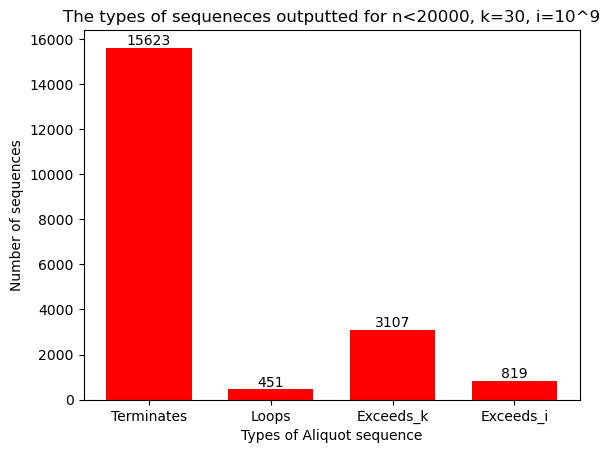

In [15]:
types = list(counts.keys())
values = list(counts.values())



bars = plt.bar(types, values, width=0.7, color='red')
plt.title('The types of sequeneces outputted for n<20000, k=30, i=10^9')
plt.xlabel('Types of Aliquot sequence')
plt.ylabel('Number of sequences')
# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height,                              # y position
        str(height),                         # label text
        ha='center', va='bottom'
    )
plt.show()

### Improving the code of the Classification 
We are very confident in the efficiency of our code above, but we are now going to test the limits of how large n_max, k_max and i_max can go so we can run the code in approximately 30 seconds.

We are going to set up an experiment function, which will test multiples combinations of n_max, k_max and i_max. 

To do this, we are going to loop over all n from 1 to n_max, and for each n generate the aliquot sequence and its status. We will then classify and tally all the sequences like above, and measure the run time for each combination of parameters.

We will show the results in a table, and then decide which combination of parameters will be the most reasonable to use as an improvement on the last question. 

The data in the table is from the code that is in ''' '''. This code takes 974.61 seconds, or 16 minutes to run. The data is copied from when the cell has been ran, and been put nicely into a table. 



In [7]:
#----CORE 5 ----

# 'The classification in part 4 will depend on the choices of the parameters k, i and the largest starting number of 20,000.
# There will be a better classification if these parameters are higher at the cost of the code taking longer to run.
# Investigate how much you can improve the classification while your code still runs in a reasonable amount of time.
# (The meaning of ‘reasonable’ depends on how patient you are, but we recommend about 30 seconds.)



"""import time
# --- Experimentation function ---
def experiment(n_max_values, k_max_values, i_max_values):
    results = []
    for n_max in n_max_values:
        for k_max in k_max_values:
            for i_max in i_max_values:
                counts = {"Terminates": 0, "Loops": 0, "Exceeds_k": 0, "Exceeds_i": 0}
                start_time = time.time()
                
                for n in range(1, n_max + 1):
                    _, status = compute_aliquot_sequence(n, k_max, i_max)  # unpack tuple
                    counts[status] += 1
                
                runtime = time.time() - start_time
                results.append({
                    "n_max": n_max,
                    "k_max": k_max,
                    "i_max": i_max,
                    **counts,
                    "runtime_s": round(runtime, 2)})
                print(f"Done n_max={n_max}, k_max={k_max}, i_max={i_max}, runtime={runtime:.2f}s")
    return results

# --- Set parameter ranges ---
n_max_values = [10000, 20000, 25000, 30000]      # Largest starting numbers
k_max_values = [30, 50, 100]       # Maximum sequence length
i_max_values = [10**9, 10**10]     # Maximum allowed value in sequence

# --- Run experiments ---
results = experiment(n_max_values, k_max_values, i_max_values)

# --- Print nicely formatted table ---
print("\nResults Table:")
header = ["n_max", "k_max", "i_max", "Terminates", "Loops", "Exceeds_k", "Exceeds_i", "runtime_s"]
print("{:<7} {:<7} {:<12} {:<10} {:<6} {:<10} {:<8} {:<10}".format(*header))
for r in results:
    print("{:<7} {:<7} {:<12} {:<10} {:<6} {:<10} {:<8} {:<10}".format(r["n_max"], r["k_max"], r["i_max"], r["Terminates"], r["Loops"], r["Exceeds_k"], r["Exceeds_i"], r["runtime_s"]))"""


'import time\n# --- Experimentation function ---\ndef experiment(n_max_values, k_max_values, i_max_values):\n    results = []\n    for n_max in n_max_values:\n        for k_max in k_max_values:\n            for i_max in i_max_values:\n                counts = {"Terminates": 0, "Loops": 0, "Exceeds_k": 0, "Exceeds_i": 0}\n                start_time = time.time()\n\n                for n in range(1, n_max + 1):\n                    _, status = compute_aliquot_sequence(n, k_max, i_max)  # unpack tuple\n                    counts[status] += 1\n\n                runtime = time.time() - start_time\n                results.append({\n                    "n_max": n_max,\n                    "k_max": k_max,\n                    "i_max": i_max,\n                    **counts,\n                    "runtime_s": round(runtime, 2)})\n                print(f"Done n_max={n_max}, k_max={k_max}, i_max={i_max}, runtime={runtime:.2f}s")\n    return results\n\n# --- Set parameter ranges ---\nn_max_values = [

### The results from running this code

$[
\begin{array}{|r|r|r|r|r|r|r|r|}
\hline
n_{\text{max}} & k_{\text{max}} & i_{\text{max}} & \text{Terminates} & \text{Loops} & \text{Exceeds}_k & \text{Exceeds}_i & \text{runtime}_s \\
\hline
10000 & 30 & 1\,000\,000\,000 & 8228 & 217 & 1255 & 300 & 3.59 \\
10000 & 30 & 10\,000\,000\,000 & 8228 & 217 & 1409 & 146 & 6.31 \\
10000 & 50 & 1\,000\,000\,000 & 8519 & 219 & 499 & 763 & 8.38 \\
10000 & 50 & 10\,000\,000\,000 & 8519 & 219 & 651 & 611 & 24.01 \\
10000 & 100 & 1\,000\,000\,000 & 8711 & 224 & 46 & 1019 & 10.71 \\
10000 & 100 & 10\,000\,000\,000 & 8715 & 224 & 88 & 973 & 37.06 \\
20000 & 30 & 1\,000\,000\,000 & 15623 & 451 & 3107 & 819 & 10.05 \\
20000 & 30 & 10\,000\,000\,000 & 15623 & 451 & 3514 & 412 & 18.7 \\
20000 & 50 & 1\,000\,000\,000 & 16487 & 457 & 1083 & 1973 & 20.51 \\
20000 & 50 & 10\,000\,000\,000 & 16487 & 457 & 1497 & 1559 & 61.91 \\
20000 & 100 & 1\,000\,000\,000 & 16979 & 465 & 98 & 2458 & 25.75 \\
20000 & 100 & 10\,000\,000\,000 & 16993 & 465 & 212 & 2330 & 88.39 \\
25000 & 30 & 1\,000\,000\,000 & 19231 & 548 & 4138 & 1083 & 13.03 \\
25000 & 30 & 10\,000\,000\,000 & 19231 & 548 & 4671 & 550 & 25.08 \\
25000 & 50 & 1\,000\,000\,000 & 20445 & 558 & 1415 & 2582 & 26.97 \\
25000 & 50 & 10\,000\,000\,000 & 20445 & 558 & 1978 & 2019 & 79.84 \\
25000 & 100 & 1\,000\,000\,000 & 21110 & 568 & 131 & 3191 & 32.7 \\
25000 & 100 & 10\,000\,000\,000 & 21137 & 568 & 283 & 3012 & 114.1 \\
30000 & 30 & 1\,000\,000\,000 & 22765 & 641 & 5246 & 1348 & 16.3 \\
30000 & 30 & 10\,000\,000\,000 & 22765 & 641 & 5912 & 682 & 31.73 \\
30000 & 50 & 1\,000\,000\,000 & 24350 & 656 & 1759 & 3235 & 33.89 \\
30000 & 50 & 10\,000\,000\,000 & 24350 & 656 & 2491 & 2503 & 101.03 \\
30000 & 100 & 1\,000\,000\,000 & 25175 & 669 & 166 & 3990 & 41.86 \\
30000 & 100 & 10\,000\,000\,000 & 25220 & 669 & 357 & 3754 & 143.71 \\
\hline
\end{array}
$

### Interpretation of the data

In [8]:
This is gonna be long but will do this this week. 


SyntaxError: invalid syntax (1930988656.py, line 1)